# Plotting Distributions Using Pandas and Seaborn

In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1, color_codes=True)

from matplotlib import pyplot as plt

In [2]:
weather = pd.read_csv('../data/london_weather.csv')

In [3]:
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Univariate Distributions

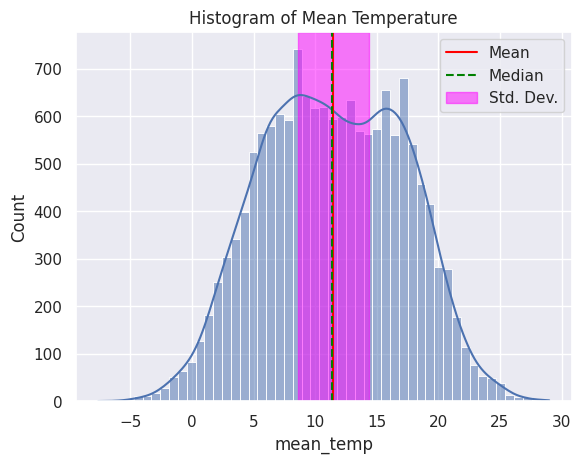

In [5]:
ax = sns.histplot(weather.mean_temp, kde=True).set(title=r'Histogram of Mean Temperature')
plt.axvline(x=weather.mean_temp.mean(), color='red', label=r'Mean')
plt.axvline(x=weather.mean_temp.median(), color='green', linestyle='--', label=r'Median')
plt.axvspan(weather.mean_temp.mean()-0.5*weather.mean_temp.std(), weather.mean_temp.mean()+0.5*weather.mean_temp.std(), alpha=0.5, color='magenta', label=r'Std. Dev.')
plt.legend();

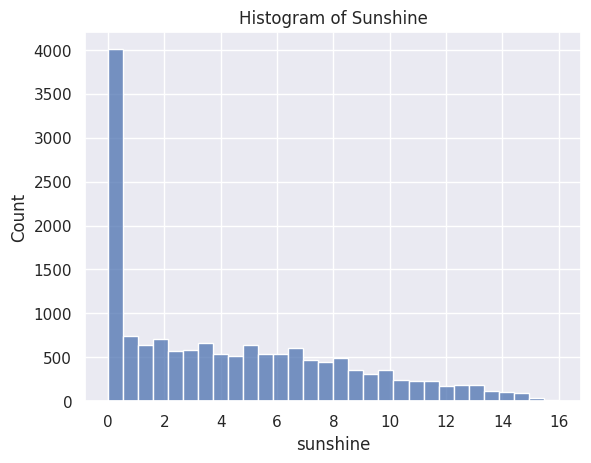

In [6]:
sns.histplot(weather.sunshine, kde=False).set(title=r'Histogram of Sunshine');
# plt.ylim([0,15000]);

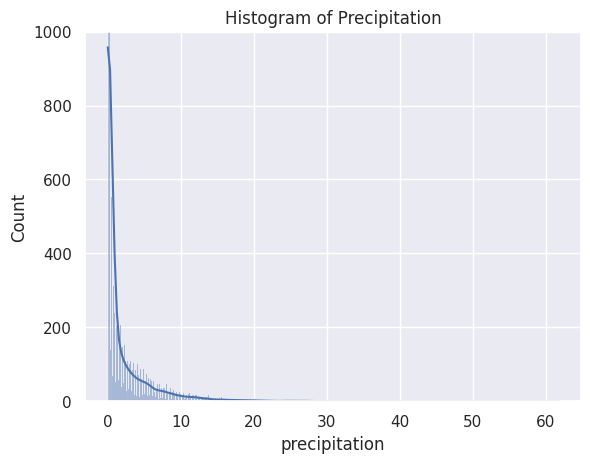

In [7]:
sns.histplot(weather.precipitation, kde=True).set(title=r'Histogram of Precipitation')
plt.ylim([0,1000]);

## Joint Distributions

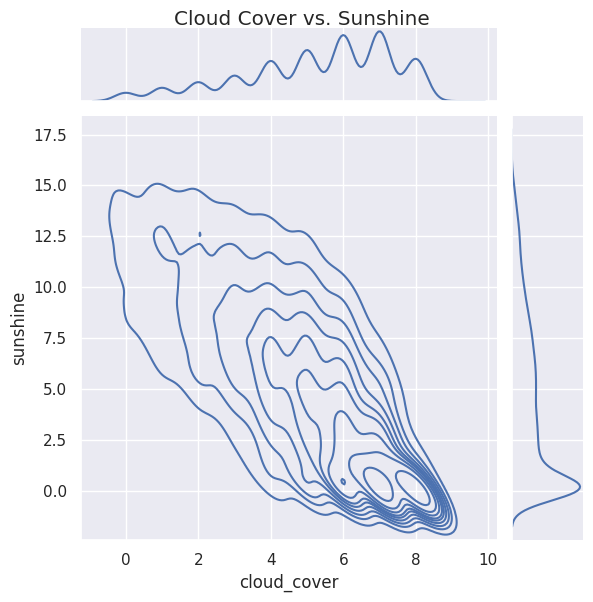

In [8]:
# p = sns.jointplot(data=weather, x='cloud_cover', y='sunshine')
p = sns.jointplot(data=weather, x='cloud_cover', y='sunshine', kind='kde')
plt.suptitle("Cloud Cover vs. Sunshine", y=1);